Stochastic Churn Forecasting (Ito Process)

**Business Context:** In subscription-based and recurring revenue models, customer churn is a critical metric. Traditional churn models often assume static probabilities, but real-world churn behaviour is dynamic and influenced by time-varying factors. This model uses stochastic calculus (Ito Process) to simulate churn probability as a time-evolving variable.

**Question:** How does churn probability evolve under uncertainty, and when should interventions be triggered to prevent customer loss?

**Approach:**
- Model churn probability using a Geometric Brownian Motion (GBM)
- Simulate multiple churn trajectories over time
- Define decision thresholds for proactive retention strategies

 **Keywords:** Churn forecasting, stochastic modelling, Ito process, GBM, retention strategy

In [ ]:
# --- Notebook Setup & Imports ---
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
np.random.seed(42)
CHURN_0 = 0.05         
MU = 0.01              
SIGMA = 0.10           
T = 52                 
N = 500                
dt = T / N
t = np.linspace(0, T, N)
NUM_SIMULATIONS = 30

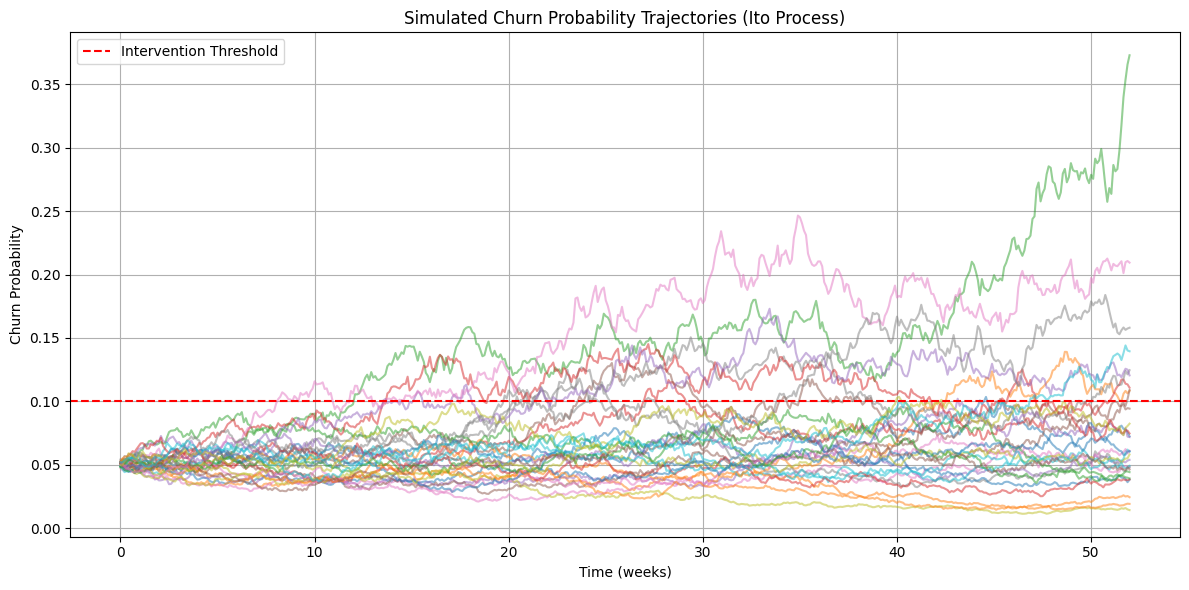

In [2]:
# --- Simulation Function ---

def simulate_churn(mu, sigma, C0, dt, N, num_paths):
    paths = np.zeros((num_paths, N))
    for i in range(num_paths):
        shocks = np.random.normal(loc=(mu - 0.5 * sigma**2) * dt, scale=sigma * np.sqrt(dt), size=N)
        paths[i] = C0 * np.exp(np.cumsum(shocks))
    return paths

# --- Run Simulation ---
churn_paths = simulate_churn(MU, SIGMA, CHURN_0, dt, N, NUM_SIMULATIONS)

# --- Plot Results ---
plt.figure(figsize=(12, 6))
for path in churn_paths:
    plt.plot(t, path, alpha=0.5)
plt.axhline(0.10, color='red', linestyle='--', label='Intervention Threshold')
plt.title('Simulated Churn Probability Trajectories (Ito Process)')
plt.xlabel('Time (weeks)')
plt.ylabel('Churn Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

--- Executive Summary & Strategic Recommendation ---

**Strategic Insight:**

- **Churn probability** evolves stochastically and can spike unexpectedly
- **Geometric Brownian Motion** captures both drift and volatility in churn behaviour
- **Intervention thresholds** (e.g., 10%) help identify when to trigger retention actions
- **Recommendation** Monitor churn using stochastic simulations to ancipate risk, also deploy retention campaigns when churn probability crosses critical thresholds, and finally use scenario planning to evaluate the worst-case churn trajectories

**Actionable Guidance:**
- Integrate stochastic churn forecasting into customer health dashboards
- Define churn thresholds to trigger automated retention workflows
- Simulate churn under different volatility and drift assumptions to stress-test retention strategies
- Prioritise high-risk cohorts for proactive engagement based on churn trajectory forecasts